<a href="https://colab.research.google.com/github/CedricVerhaegh221350/SUPSI_Spring25/blob/main/TimeSeriesForecasting/W2/simple_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple forecasting models and stochastic processes tests
In this exercise we will use ACF, portmaneau tests and stationarity tests to understand if a time series can be easily forecasted.

We start by analysing time series in terms of correlation of close timesteps. Using the ACF and stationarity tests is possible to understand whether a time series is similar to a white noise process.
White noise-like processes have two contrastin properties when it comes to forecasting:
* stationarity: properties of the signal sucha as mean and variance can almost surely be estimated
* aleatoric updates: this make forecasting a specific timestep extremely challenging


In [ ]:
%%capture
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

Let's plot some time series and their ACF with associated static confidance bands for the IID test we crafted during the lecture. Do you agree with what the ACFs suggest?

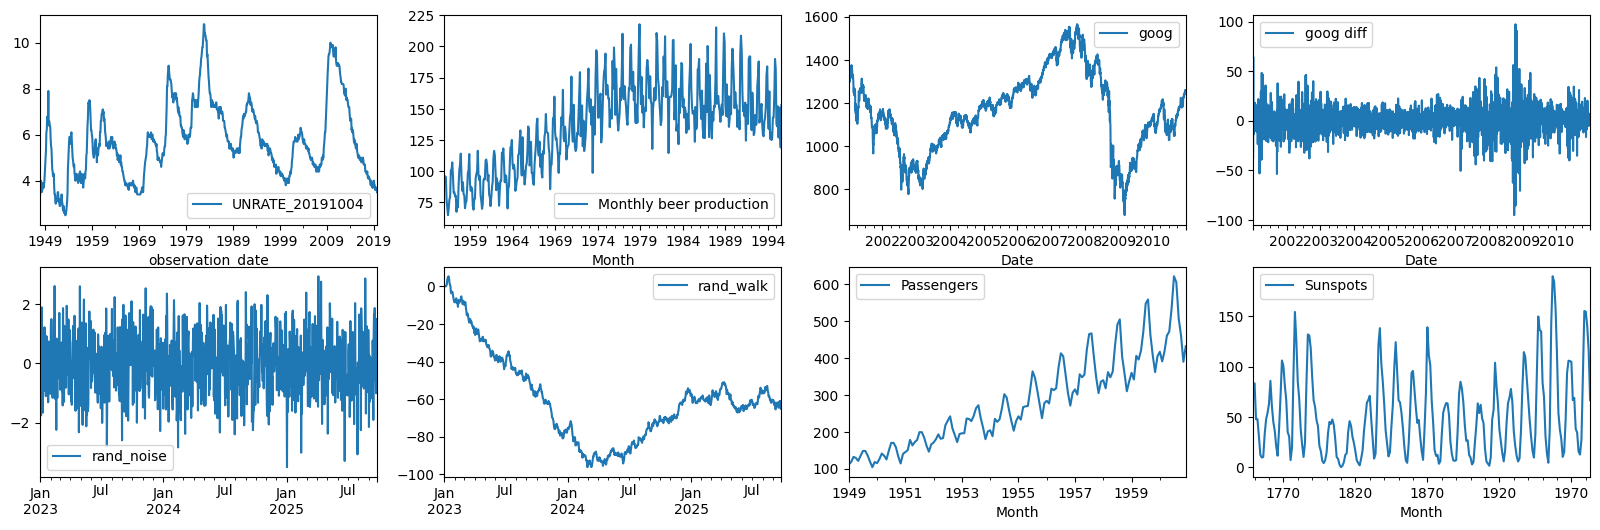

In [ ]:
dfs = pd.read_pickle('https://github.com/nepslor/teaching/raw/refs/heads/main/TimeSeriesForecasting/data/ts_datasets.pk')
fig, ax = plt.subplots(2, 4, figsize=(20, 6))
for a, df in zip(ax.ravel(), dfs):
    df.plot(ax=a)

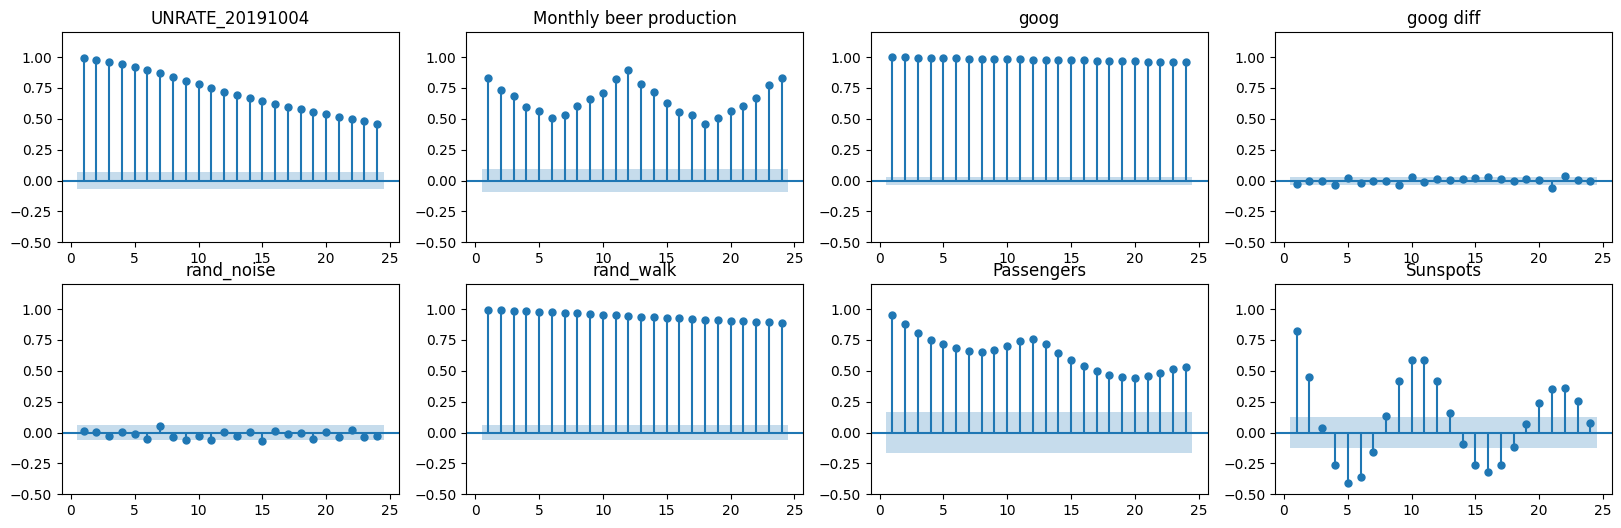

In [ ]:
fig, ax = plt.subplots(2, 4, figsize=(20, 6))
for a, df in zip(ax.ravel(), dfs):
    plot_acf(df.values.ravel(), lags=24, zero=False, bartlett_confint=False, ax=a,title=df.columns[0])
    a.set_ylim(-0.5, 1.2)


# Stationarity tests
We report here the two main tests for stationarity:


| Test    | H0 | H1 |
| --------| ------- | ------- |
| ADF     | The series is  non-stationary  |  stationary     |
| KPSS    | The series is  trend-stationary |  non-stationary  |



In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss

stationarity_tests = {}
for a, df in zip(ax.ravel(), dfs):
    adf_test = adfuller(df.values.ravel())
    kpss_test = kpss(df.values.ravel())
    stationarity_tests[df.columns[0]] = pd.Series({'adf pval': adf_test[1], 'kpss pval': kpss_test[1]})


pd.concat(stationarity_tests).unstack().sort_values('adf pval')

<ipython-input-50-42aa27688584>:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(df.values.ravel())
<ipython-input-50-42aa27688584>:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(df.values.ravel())
<ipython-input-50-42aa27688584>:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(df.values.ravel())
<ipython-input-50-42aa27688584>:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(df.values.ravel())
<ipython-input-50-42aa27688584>:6: Inter

,adf pval,kpss pval
rand_noise,0.000000e+00,0.100000
goog diff,8.996025e-21,0.100000
rand_walk,2.928480e-02,0.010000
UNRATE_20191004,4.010768e-02,0.029595
Sunspots,1.475321e-01,0.070114
Monthly beer production,1.776210e-01,0.010000
goog,3.060989e-01,0.010000
Passengers,9.918802e-01,0.010000


### ❓ Code the simple forecasting methods we have seen during the last lecture

Write 1-line functions for the following simple forecasting methods

* naive:$$\hat{y}_{T+h \mid T}=y_T$$
* mean: $$\hat{y}_{T+h \mid T}=\bar{y}=\left(y_1+\cdots+y_T\right) / T$$
* seasonal naive: $$\hat{y}_{T+h \mid T}=y_{T+h-m(k+1)}$$

the forecasts accept as input the time series up to the last timestep, $[x_{t}]_{t=0}^T$ and the parameter $h$ indicating the number of steps ahead to be predicted.


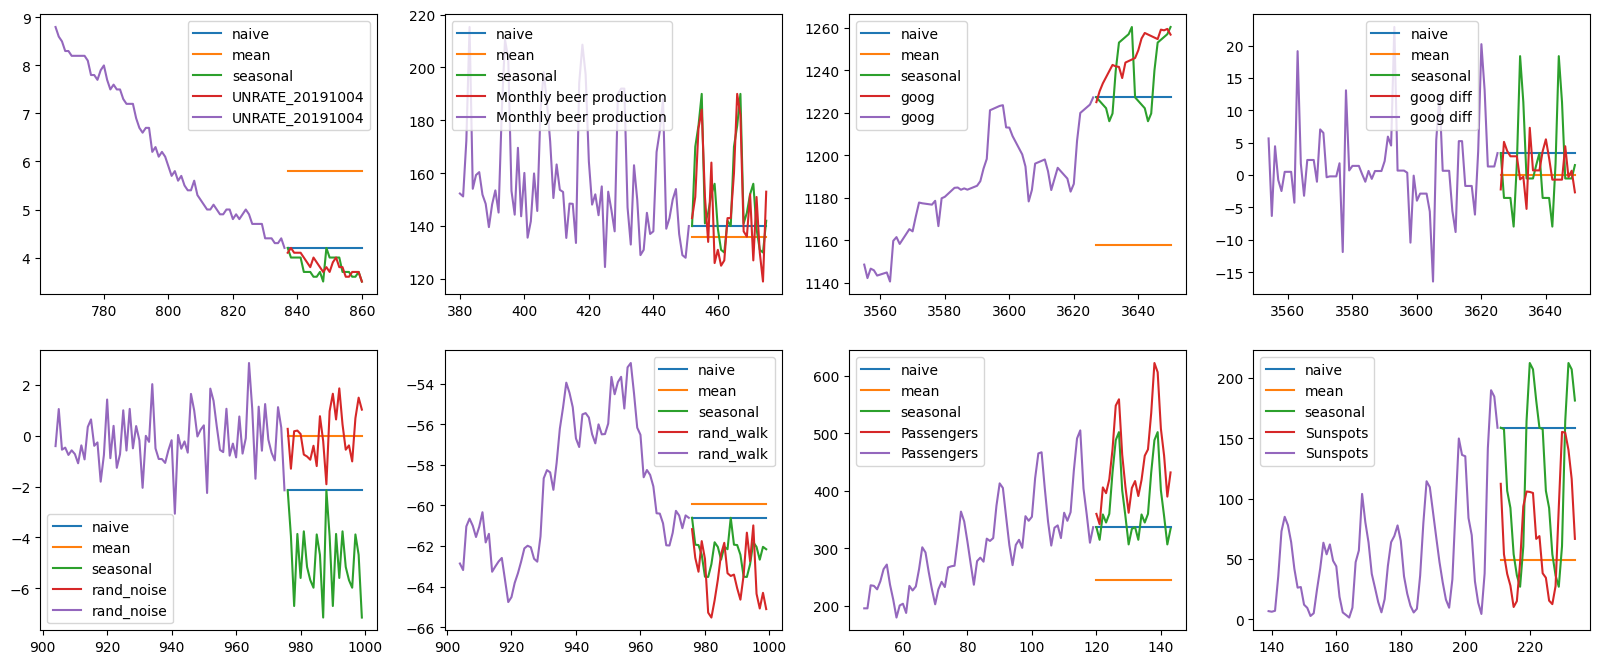

In [ ]:

def cast_df(y, df):
    h = len(y)
    return pd.DataFrame(y, index=np.arange(len(df), len(df)+h))


# code the three naive methods that we've seen
def naive(x, h):
  pass
def mean(x, h):
  pass
def seasonal(x, h):
  pass

# forecast all the datasets and test on the last 24 steps
forecasters = [naive, mean, seasonal]
forecasers_names = ['naive', 'mean', 'seasonal']
steps_ahead = 24
fig, ax = plt.subplots(2, 4, figsize=(20, 8))
for a, df in zip(ax.ravel(), dfs):
    df.reset_index(drop=True, inplace=True)
    df_tr, df_te = df.iloc[:-steps_ahead], df.iloc[-steps_ahead:]
    steps_ahead = 24
    forecasts = {}
    for f, n in zip(forecasters, forecasers_names):
        forecasts[n] = f(df_tr, steps_ahead)
    [a.plot(v, label=k) for k, v in forecasts.items()]
    df_te.plot(ax=a)
    df_tr.iloc[-steps_ahead*3:].plot(ax=a)
    a.legend()

# Retrieve the normalized mean absolute error in CV
We can define the nMAE as $$nMAE =  \frac{\frac{1}{h}\sum_{t=T}^{T+h} \vert y_t -\hat{y}_t  \vert}{\frac{1}{h}\sum_{t=T}^{T+h} (y_t-\bar{y})}$$
This function gives an idea of the forecasting error over the whole prediction horizon, normalized by the variance of the signal over the h. Since it's normalized by how much the signal varies in the forecasting period, should be a good metric to compare different signals in terms of "how good" we are at forecasting them.

❓ Write a 1-line function for the nMAE and retrieve errors for all the combinations of forecasters and datasets in CV



In [ ]:

# define nmae
nmae = lambda x, y: 0 #

n_prediction_steps = 70
steps_ahead = 24
nmaes_df = {}
errors_df_1_sa = {}
for df in dfs:
    errors = []
    nmaes = []
    df.reset_index(drop=True, inplace=True)
    for i in range(n_prediction_steps):
        df_i = df.iloc[:steps_ahead*2 + i]
        df_tr, df_te = df_i.iloc[:-steps_ahead], df_i.iloc[-steps_ahead:]
        forecasts = {n: f(df_tr, steps_ahead) for f, n in zip(forecasters, forecasers_names)}
        errors.append({n: (df_te.values.ravel()[0] - forecast.values.ravel()[0]) for n, forecast in forecasts.items()})
        nmaes.append({n: nmae(df_te.values, forecast) for n, forecast in forecasts.items()})
    nmaes_df[str(df.columns[0])] = pd.DataFrame(nmaes)
    errors_df_1_sa[str(df.columns[0])] = pd.DataFrame(errors)
errors_df_1_sa = pd.concat(errors_df_1_sa, axis=1)
nmaes_df = pd.concat(nmaes_df, axis=1)

errors_df_1_sa

UNRATE_20191004                     ...   Sunspots                      
             naive      mean seasonal  ...      naive       mean   seasonal
0             -0.1  1.600000     -0.1  ... -31.716667 -17.004514 -31.716667
1             -0.1  1.436000     -0.1  ...  -4.158333 -20.482667  -4.158333
2             -0.1  1.280769     -0.1  ... -23.608333 -43.303205 -23.608333
3             -0.5  0.733333     -0.5  ...  12.808333 -28.891049  12.808333
4             -0.3  0.407143     -0.3  ...  72.683333  44.824107  72.683333
..             ...       ...      ...  ...        ...        ...        ...
65            -0.1 -0.083146     -0.1  ... -35.125000  58.006086 -35.125000
66            -0.2 -0.282222     -0.2  ... -17.333333  40.028241 -17.333333
67             0.2 -0.079121      0.2  ... -22.625000  16.963370 -22.625000
68            -0.1 -0.178261     -0.1  ... -26.391667  -9.612681 -26.391667
69             0.2  0.023656      0.2  ... -12.608333 -22.117652 -12.608333

[70 rows x 24 columns]

Let's now plot the nMAE for different methods and different signals. What do you notice?


<Axes: >

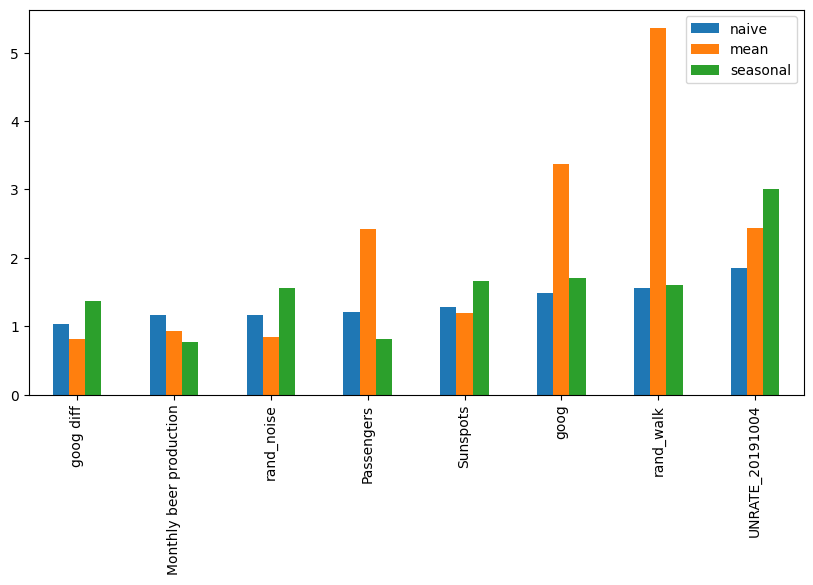

In [ ]:
nmaes_df.mean().unstack().sort_values('naive').plot(kind='bar',  figsize=(10, 5))

# Portmanteau tests on the residual
Let's try another method to compare how good we are at forecasting each signal. We are now interested in the autocorrelation propoerties of the residual (error).
In particular, if the error time series is uncorrelated (similar to white noise) we are almost sure no further information can be extracted from it to forecast the signal itself. Conversely, if the error seems autocorrelated, it means we could fit a secon model on it to improve the forecast (or directly improve the existing one).

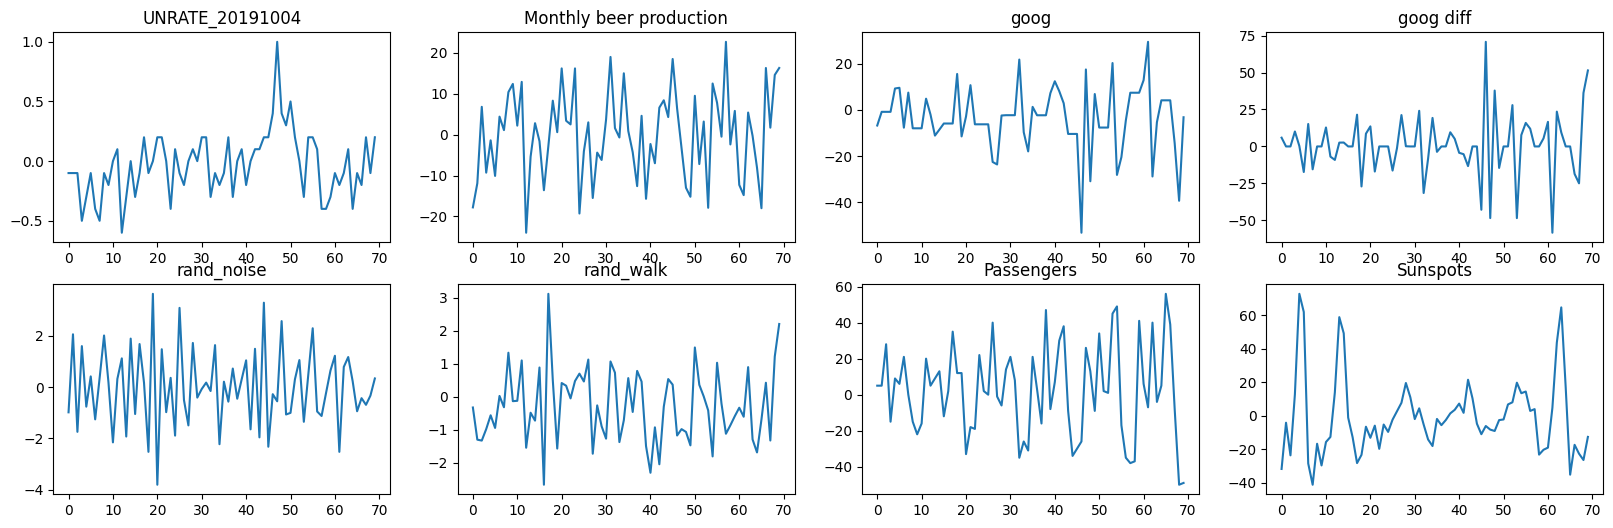

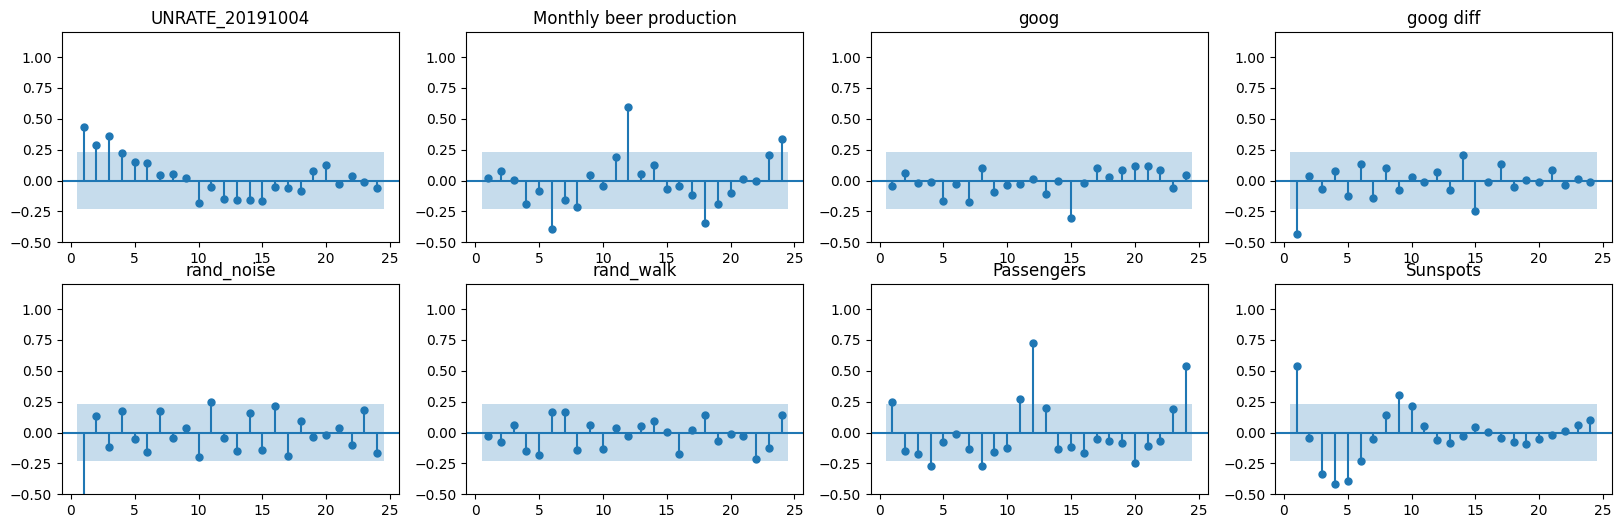

In [ ]:
series_names = errors_df_1_sa.columns.get_level_values(0).unique()
fig, ax = plt.subplots(2, 4, figsize=(20, 6))
for a, series_name in zip(ax.ravel(), series_names):
    errors_df_1_sa[series_name]['naive'].plot(ax=a)
    a.set_title(series_name)

fig, ax = plt.subplots(2, 4, figsize=(20, 6))
for a, series_name in zip(ax.ravel(), series_names):
    plot_acf(errors_df_1_sa[series_name]['naive'].values.ravel(), lags=24, zero=False, bartlett_confint=False, ax=a,title=series_name)
    a.set_ylim(-0.5, 1.2)

In [ ]:
import statsmodels.api as sm
tests = []
for series_name in series_names:
  results = sm.stats.acorr_ljungbox(errors_df_1_sa[series_name]['naive'].values, lags=[10], return_df=True)
  results.index = [series_name]
  tests.append(results)

pd.concat(tests).sort_values('lb_pvalue')

,lb_stat,lb_pvalue
Sunspots,72.748992,1.302497e-11
UNRATE_20191004,39.798831,1.838398e-05
rand_noise,39.236676,2.307630e-05
Passengers,25.139524,5.087222e-03
Monthly beer production,21.634312,1.707988e-02
goog diff,20.537470,2.455994e-02
rand_walk,12.933903,2.273909e-01
goog,6.705006,7.529697e-01
